# Processing Example

## Comfort Processor

This code calculates Ride Comfort according to EN 12299

In [1]:
import pyridy
from matplotlib import pyplot as plt
from pyridy.processing import ComfortProcessor, ExcitationProcessor

path = "../ridy_data"
my_campaign = pyridy.Campaign()
my_campaign.import_folder(folder = path, download_osm_data=True,
                              railway_types=["tram"],
                              osm_recurse_type="<")


File Import:   0%|          | 0/1 [00:00<?, ?it/s]

[WinError 10061] Es konnte keine Verbindung hergestellt werden, da der Zielcomputer die Verbindung verweigerte
[WinError 10060] Ein Verbindungsversuch ist fehlgeschlagen, da die Gegenstelle nach einer bestimmten Zeitspanne nicht richtig reagiert hat, oder die hergestellte Verbindung war fehlerhaft, da der verbundene Host nicht reagiert hat


Bounding Boxes:   0%|          | 0/1 [00:00<?, ?it/s]

Railway Types:   0%|          | 0/1 [00:00<?, ?it/s]

In [2]:
ComfortProcessor(my_campaign, v_thres=10/3.6).execute()
result = my_campaign.results[ComfortProcessor][my_campaign[0].filename]

  0%|          | 0/1 [00:00<?, ?it/s]

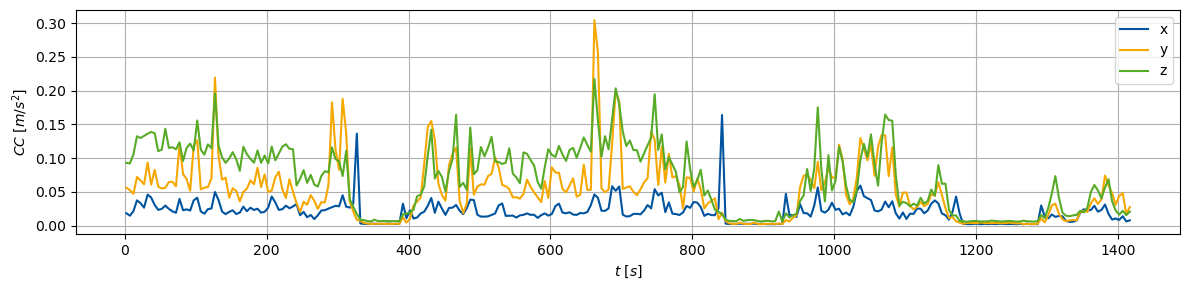

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))

ax.plot(result['t'], result['cc_x'], label='x')
ax.plot(result['t'], result['cc_y'], label='y')
ax.plot(result['t'], result['cc_z'], label='z')
ax.grid()

ax.set_xlabel('$t$ [$s$]')
ax.set_ylabel('$CC$ [$m/s^2$]')
ax.legend(loc=1)

plt.tight_layout()
plt.show()

## Excitation Processor

This part executes the excitation processing and adds the result to a map

In [4]:
Excitation_processor=ExcitationProcessor(my_campaign)
Excitation_processor.execute()
m = ExcitationProcessor.create_map(Excitation_processor)
m

  0%|          | 0/1 [00:00<?, ?it/s]

(50.90696334838867, 6.762060165405273)


Map(center=[50.90696334838867, 6.762060165405273], controls=(ZoomControl(options=['position', 'zoom_in_text', …